In [99]:
import pandas as pd
import matplotlib.pyplot as plt
dfile = pd.read_csv('2010-2011 Solar home electricity data.csv', skiprows=1,parse_dates=['date'], dayfirst=True,
                    na_filter=False, dtype={'Row Quality': str})
d0, d1 = dfile.date.min(), dfile.date.max()
d0, d1

from pandas.tseries.offsets import Day
index = pd.date_range(d0, d1 + Day(1), freq='30T', closed='left')
customers = sorted(dfile.Customer.unique())
channels = dfile['Consumption Category'].unique()
channels = ['GC', 'GG', 'CL']
columns = pd.MultiIndex.from_product(
    (customers, channels), names=['Customer', 'Channel'])
cols_index = pd.MultiIndex(
    levels=[customers, channels],
    codes=[[],[]],
    names=['Customer', 'Channel'])
df = pd.DataFrame(index=index, columns=cols_index)
df
missing_records = []

for c in customers:
    dcust = dfile[dfile.Customer == c]
    
    
    print(c, end=', ')
    
    for ch in channels:
        d_c_cust = dcust[dcust['Consumption Category'] == ch]
        sLength = len(d_c_cust['Customer'])
        d_c_cust['e'] = pd.Series(np.random.randn(sLength), index=d_c_cust.index)
        ts = d_c_cust.iloc[:,5:-1].values.ravel()
        if len(ts) != len(index):
            missing_records.append((c,ch, len(ts)))
        else:
            df[c, ch] = ts
df 

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

C:\Users\HP\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 

C:\Users\HP\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,

Customer               1                  2                3                \
Channel                 GC   GG     CL     GC   GG   CL     GC   GG     CL   
2010-07-01 00:00:00  0.303  0.0  1.250  0.085  0.0  0.0  0.669  0.0  2.029   
2010-07-01 00:30:00  0.471  0.0  1.244  0.142  0.0  0.0  0.671  0.0  2.013   
2010-07-01 01:00:00  0.083  0.0  1.256  0.082  0.0  0.0  0.675  0.0  1.000   
2010-07-01 01:30:00  0.121  0.0  0.744  0.119  0.0  0.0  0.683  0.0  0.000   
2010-07-01 02:00:00  0.361  0.0  0.019  0.105  0.0  0.0  0.694  0.0  0.000   
...                    ...  ...    ...    ...  ...  ...    ...  ...    ...   
2011-06-30 21:30:00  0.228  0.0  0.000  0.246  0.0  0.0  0.459  0.0  0.000   
2011-06-30 22:00:00  0.458  0.0  0.000  0.302  0.0  0.0  0.456  0.0  0.000   
2011-06-30 22:30:00  0.685  0.0  0.000  0.348  0.0  0.0  0.722  0.0  0.000   
2011-06-30 23:00:00  0.650  0.0  0.000  0.248  0.0  0.0  0.060  0.0  0.000   
2011-06-30 23:30:00  0.650  0.0  1.094  0.294  0.0  0.0  0.108  0.0  0.000   

Customer               4    ...    297                298         299       \
Channel                 GC  ...     GC   GG     CL     GC   GG     GC   GG   
2010-07-01 00:00:00  0.075  ...  0.205  0.0  0.000  0.096  0.0  1.464  0.0   
2010-07-01 00:30:00  0.086  ...  0.106  0.0  0.000  0.110  0.0  1.413  0.0   
2010-07-01 01:00:00  0.085  ...  0.169  0.0  0.000  0.080  0.0  1.428  0.0   
2010-07-01 01:30:00  0.084  ...  0.270  0.0  0.000  0.105  0.0  1.445  0.0   
2010-07-01 02:00:00  0.084  ...  0.255  0.0  0.000  0.089  0.0  1.407  0.0   
...                    ...  ...    ...  ...    ...    ...  ...    ...  ...   
2011-06-30 21:30:00  0.112  ...  0.356  0.0  0.000  0.685  0.0  0.876  0.0   
2011-06-30 22:00:00  0.100  ...  0.308  0.0  0.782  0.450  0.0  0.258  0.0   
2011-06-30 22:30:00  0.106  ...  0.182  0.0  2.409  0.281  0.0  0.126  0.0   
2011-06-30 23:00:00  0.109  ...  0.292  0.0  1.998  0.279  0.0  0.167  0.0   
2011-06-30 23:30:00  0.108  ...  0.317  0.0  0.000  0.187  0.0  0.145  0.0   

Customer               300              
Channel                 GC   GG     CL  
2010-07-01 00:00:00  0.279  0.0  2.487  
2010-07-01 00:30:00  0.924  0.0  2.392  
2010-07-01 01:00:00  0.803  0.0  1.285  
2010-07-01 01:30:00  0.066  0.0  0.000  
2010-07-01 02:00:00  0.089  0.0  0.000  
...                    ...  ...    ...  
2011-06-30 21:30:00  0.789  0.0  0.000  
2011-06-30 22:00:00  0.280  0.0  0.000  
2011-06-30 22:30:00  0.224  0.0  0.000  
2011-06-30 23:00:00  0.259  0.0  0.000  
2011-06-30 23:30:00  0.774  0.0  2.528  

[17520 rows x 739 columns]

In [100]:

featured            =   [2,13, 14, 20, 33, 35, 38, 39, 56,
                        69, 73, 74, 75, 82, 87, 88, 101, 104,
                        106, 109, 110, 119, 124, 130, 137, 141, 144,
                        152, 153, 157, 161, 169, 176, 184, 188, 189,
                        193, 201, 202, 204, 206, 207, 210, 211, 212,
                        214, 218, 244, 246, 253, 256, 273, 276, 297 
                       ]
DF = df[1]
# for x in range(1, 6):
#   print(x) 
# for i in range(1, 301):
# for i in featured:
for i in featured:
    if df[i].shape[1] == 3:
        DF = DF + df[i]
    else:
        DF = DF + df[i].assign(CL = 0)

DF = DF - df[1]
DF.head(48)

Channel,GC,GG,CL
2010-07-01 00:00:00,15.209,0.000,26.415
2010-07-01 00:30:00,12.633,0.007,19.556
2010-07-01 01:00:00,10.385,0.006,12.882
2010-07-01 01:30:00,9.764,0.006,7.893
2010-07-01 02:00:00,9.849,0.000,6.856
2010-07-01 02:30:00,9.515,0.000,7.489
2010-07-01 03:00:00,9.315,0.000,5.435
2010-07-01 03:30:00,9.390,0.000,3.393
2010-07-01 04:00:00,12.491,0.000,6.580
2010-07-01 04:30:00,15.396,0.006,3.606


In [101]:
DF['net'] =  DF['GC'] - DF['GG'] + DF['CL']
DF_GC1 = DF.drop(['GC','CL'],axis = 1)
DF_GC1

Channel,GG,net
2010-07-01 00:00:00,0.000,41.624
2010-07-01 00:30:00,0.007,32.182
2010-07-01 01:00:00,0.006,23.261
2010-07-01 01:30:00,0.006,17.651
2010-07-01 02:00:00,0.000,16.705
...,...,...
2011-06-30 21:30:00,0.006,36.451
2011-06-30 22:00:00,0.000,32.103
2011-06-30 22:30:00,0.000,29.151
2011-06-30 23:00:00,0.001,26.475


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
dfile = pd.read_csv('2011-2012 Solar home electricity data v2.csv', skiprows=1,parse_dates=['date'], dayfirst=True,
                    na_filter=False, dtype={'Row Quality': str})
d0, d1 = dfile.date.min(), dfile.date.max()
d0, d1

from pandas.tseries.offsets import Day
index = pd.date_range(d0, d1 + Day(1), freq='30T', closed='left')
customers = sorted(dfile.Customer.unique())
channels = dfile['Consumption Category'].unique()
channels = ['GC', 'GG', 'CL']
columns = pd.MultiIndex.from_product(
    (customers, channels), names=['Customer', 'Channel'])
cols_index = pd.MultiIndex(
    levels=[customers, channels],
    codes=[[],[]],
    names=['Customer', 'Channel'])
df = pd.DataFrame(index=index, columns=cols_index)
df
missing_records = []

for c in customers:
    dcust = dfile[dfile.Customer == c]
    
    
    print(c, end=', ')
    
    for ch in channels:
        d_c_cust = dcust[dcust['Consumption Category'] == ch]
        ts = d_c_cust.iloc[:,5:-1].values.ravel()
        if len(ts) != len(index):
            missing_records.append((c,ch, len(ts)))
        else:
            df[c, ch] = ts
df 

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 

C:\Users\HP\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 

Customer               1                  2                3                  \
Channel                 GC   GG     CL     GC   GG   CL     GC     GG     CL   
2011-07-01 00:00:00  1.077  0.0  1.250  0.276  0.0  0.0  0.060  0.000  2.008   
2011-07-01 00:30:00  0.669  0.0  1.250  0.134  0.0  0.0  0.062  0.000  0.218   
2011-07-01 01:00:00  0.674  0.0  1.250  0.169  0.0  0.0  0.060  0.000  0.000   
2011-07-01 01:30:00  0.615  0.0  0.625  0.185  0.0  0.0  0.059  0.000  0.000   
2011-07-01 02:00:00  0.321  0.0  0.219  0.141  0.0  0.0  0.060  0.000  0.000   
...                    ...  ...    ...    ...  ...  ...    ...    ...    ...   
2012-06-30 21:30:00  0.622  0.0  0.000  0.368  0.0  0.0  0.066  0.000  0.000   
2012-06-30 22:00:00  0.509  0.0  0.000  0.305  0.0  0.0  0.768  0.000  0.000   
2012-06-30 22:30:00  0.716  0.0  0.000  0.285  0.0  0.0  0.966  0.000  0.000   
2012-06-30 23:00:00  0.999  0.0  0.000  0.286  0.0  0.0  0.957  0.006  0.000   
2012-06-30 23:30:00  0.916  0.0  1.063  0.188  0.0  0.0  0.902  0.000  0.000   

Customer               4    ...    297                298         299       \
Channel                 GC  ...     GC   GG     CL     GC   GG     GC   GG   
2011-07-01 00:00:00  0.104  ...  0.268  0.0  0.000  0.100  0.0  0.140  0.0   
2011-07-01 00:30:00  0.107  ...  0.329  0.0  0.000  0.068  0.0  0.160  0.0   
2011-07-01 01:00:00  0.104  ...  0.306  0.0  0.000  0.068  0.0  0.116  0.0   
2011-07-01 01:30:00  0.108  ...  0.233  0.0  1.311  0.068  0.0  0.162  0.0   
2011-07-01 02:00:00  0.110  ...  0.265  0.0  0.000  0.069  0.0  0.138  0.0   
...                    ...  ...    ...  ...    ...    ...  ...    ...  ...   
2012-06-30 21:30:00  0.159  ...  0.366  0.0  0.000  0.173  0.0  1.095  0.0   
2012-06-30 22:00:00  0.134  ...  0.458  0.0  0.814  0.154  0.0  0.946  0.0   
2012-06-30 22:30:00  0.101  ...  0.305  0.0  2.369  0.150  0.0  1.834  0.0   
2012-06-30 23:00:00  0.086  ...  0.165  0.0  1.915  0.142  0.0  1.719  0.0   
2012-06-30 23:30:00  0.082  ...  0.206  0.0  0.000  0.145  0.0  1.412  0.0   

Customer               300              
Channel                 GC   GG     CL  
2011-07-01 00:00:00  1.034  0.0  2.533  
2011-07-01 00:30:00  0.631  0.0  0.265  
2011-07-01 01:00:00  0.119  0.0  0.000  
2011-07-01 01:30:00  0.098  0.0  0.000  
2011-07-01 02:00:00  0.109  0.0  0.000  
...                    ...  ...    ...  
2012-06-30 21:30:00  0.200  0.0  0.000  
2012-06-30 22:00:00  0.204  0.0  0.000  
2012-06-30 22:30:00  0.131  0.0  0.000  
2012-06-30 23:00:00  0.358  0.0  0.000  
2012-06-30 23:30:00  0.235  0.0  2.621  

[17568 rows x 738 columns]

In [103]:

featured            =   [2,13, 14, 20, 33, 35, 38, 39, 56,
                        69, 73, 74, 75, 82, 87, 88, 101, 104,
                        106, 109, 110, 119, 124, 130, 137, 141, 144,
                        152, 153, 157, 161, 169, 176, 184, 188, 189,
                        193, 201, 202, 204, 206, 207, 210, 211, 212,
                        214, 218, 244, 246, 253, 256, 273, 276, 297 
                       ]
DF = df[1]
# for x in range(1, 6):
#   print(x) 
# for i in range(1, 301):
# for i in featured:
for i in featured:
    if df[i].shape[1] == 3:
        DF = DF + df[i]
    else:
        DF = DF + df[i].assign(CL = 0)

DF = DF - df[1]
DF.head(48)

Channel,GC,GG,CL
2011-07-01 00:00:00,14.677,0.012,24.568
2011-07-01 00:30:00,12.612,0.000,25.145
2011-07-01 01:00:00,11.118,0.000,21.568
2011-07-01 01:30:00,10.566,0.006,19.554
2011-07-01 02:00:00,9.204,0.000,9.523
2011-07-01 02:30:00,8.850,0.000,2.085
2011-07-01 03:00:00,8.762,0.000,0.000
2011-07-01 03:30:00,8.886,0.006,1.132
2011-07-01 04:00:00,10.182,0.000,0.000
2011-07-01 04:30:00,10.130,0.000,2.133


In [104]:
DF['net'] =  DF['GC'] - DF['GG'] + DF['CL']
DF_GC2 = DF.drop(['GC','CL'],axis = 1)
DF_GC2

Channel,GG,net
2011-07-01 00:00:00,0.012,39.233
2011-07-01 00:30:00,0.000,37.757
2011-07-01 01:00:00,0.000,32.686
2011-07-01 01:30:00,0.006,30.114
2011-07-01 02:00:00,0.000,18.727
...,...,...
2012-06-30 21:30:00,0.006,29.840
2012-06-30 22:00:00,0.000,30.898
2012-06-30 22:30:00,0.006,27.749
2012-06-30 23:00:00,0.018,27.906


<AxesSubplot:>

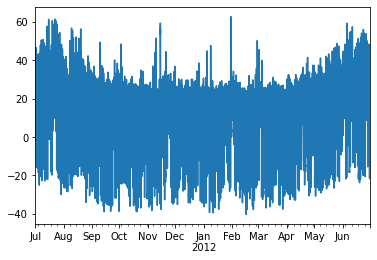

In [105]:
DF_GC2['net'].plot()

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
dfile = pd.read_csv('2012-2013 Solar home electricity data v2.csv', skiprows=1,parse_dates=['date'], dayfirst=True,
                    na_filter=False, dtype={'Row Quality': str})
d0, d1 = dfile.date.min(), dfile.date.max()
d0, d1

from pandas.tseries.offsets import Day
index = pd.date_range(d0, d1 + Day(1), freq='30T', closed='left')
customers = sorted(dfile.Customer.unique())
channels = dfile['Consumption Category'].unique()
channels = ['GC', 'GG', 'CL']
columns = pd.MultiIndex.from_product(
    (customers, channels), names=['Customer', 'Channel'])
cols_index = pd.MultiIndex(
    levels=[customers, channels],
    codes=[[],[]],
    names=['Customer', 'Channel'])
df = pd.DataFrame(index=index, columns=cols_index)
df
missing_records = []

for c in customers:
    dcust = dfile[dfile.Customer == c]
    
    
    print(c, end=', ')
    
    for ch in channels:
        d_c_cust = dcust[dcust['Consumption Category'] == ch]
        ts = d_c_cust.iloc[:,5:-1].values.ravel()
        if len(ts) != len(index):
            missing_records.append((c,ch, len(ts)))
        else:
            df[c, ch] = ts
df 


1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 

C:\Users\HP\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 

Customer               1                  3                4                \
Channel                 GC   GG     CL     GC   GG   CL     GC   GG     CL   
2012-07-01 00:00:00  0.855  0.0  1.250  0.965  0.0  0.0  0.084  0.0  0.000   
2012-07-01 00:30:00  0.786  0.0  1.250  0.927  0.0  0.0  0.084  0.0  0.000   
2012-07-01 01:00:00  0.604  0.0  1.250  1.359  0.0  0.0  0.082  0.0  1.930   
2012-07-01 01:30:00  0.544  0.0  1.263  0.060  0.0  0.0  0.084  0.0  1.978   
2012-07-01 02:00:00  0.597  0.0  0.131  0.059  0.0  0.0  0.086  0.0  0.784   
...                    ...  ...    ...    ...  ...  ...    ...  ...    ...   
2013-06-30 21:30:00  0.274  0.0  0.000  0.056  0.0  0.0  0.134  0.0  0.000   
2013-06-30 22:00:00  0.509  0.0  0.000  0.056  0.0  0.0  0.137  0.0  0.000   
2013-06-30 22:30:00  0.166  0.0  0.000  0.065  0.0  0.0  0.140  0.0  0.000   
2013-06-30 23:00:00  0.861  0.0  0.000  0.063  0.0  0.0  0.112  0.0  0.000   
2013-06-30 23:30:00  0.631  0.0  1.056  0.052  0.0  0.0  0.107  0.0  0.000   

Customer               5    ...    297                298         299       \
Channel                 GC  ...     GC   GG     CL     GC   GG     GC   GG   
2012-07-01 00:00:00  0.108  ...  0.141  0.0  0.000  0.157  0.0  0.541  0.0   
2012-07-01 00:30:00  0.098  ...  0.257  0.0  0.000  0.127  0.0  0.100  0.0   
2012-07-01 01:00:00  0.105  ...  0.197  0.0  0.000  0.122  0.0  0.090  0.0   
2012-07-01 01:30:00  0.075  ...  0.273  0.0  1.330  0.120  0.0  0.094  0.0   
2012-07-01 02:00:00  0.102  ...  0.206  0.0  0.000  0.106  0.0  0.046  0.0   
...                    ...  ...    ...  ...    ...    ...  ...    ...  ...   
2013-06-30 21:30:00  0.390  ...  0.167  0.0  0.000  0.267  0.0  0.618  0.0   
2013-06-30 22:00:00  0.413  ...  0.179  0.0  0.775  0.273  0.0  0.568  0.0   
2013-06-30 22:30:00  1.068  ...  0.181  0.0  2.413  0.247  0.0  0.832  0.0   
2013-06-30 23:00:00  1.084  ...  0.171  0.0  1.095  0.149  0.0  0.760  0.0   
2013-06-30 23:30:00  0.999  ...  0.177  0.0  0.000  0.138  0.0  0.150  0.0   

Customer               300              
Channel                 GC   GG     CL  
2012-07-01 00:00:00  0.219  0.0  2.673  
2012-07-01 00:30:00  0.099  0.0  1.246  
2012-07-01 01:00:00  0.134  0.0  0.000  
2012-07-01 01:30:00  0.100  0.0  0.000  
2012-07-01 02:00:00  0.123  0.0  0.000  
...                    ...  ...    ...  
2013-06-30 21:30:00  0.581  0.0  0.000  
2013-06-30 22:00:00  0.458  0.0  0.000  
2013-06-30 22:30:00  0.472  0.0  0.000  
2013-06-30 23:00:00  0.732  0.0  0.000  
2013-06-30 23:30:00  0.297  0.0  2.468  

[17520 rows x 725 columns]

In [107]:

featured            =   [13, 14, 20, 33, 35, 38, 39, 56,
                        69, 73, 74, 75, 82, 87, 88, 101, 104,
                        106, 109, 110, 119, 124, 130, 137, 141, 144,
                        152, 153, 157, 161, 169, 176, 184, 188, 189,
                        193, 201, 202, 204, 206, 207, 210, 211, 212,
                        214, 218, 244, 246, 253, 256, 273, 276, 297 
                       ]
DF = df[1]
# for x in range(1, 6):
#   print(x) 
# for i in range(1, 301):
# for i in featured:
for i in featured:
    if df[i].shape[1] == 3:
        DF = DF + df[i]
    else:
        DF = DF + df[i].assign(CL = 0)

DF = DF - df[1]
DF.head(48)

Channel,GC,GG,CL
2012-07-01 00:00:00,14.999,0.006,17.042
2012-07-01 00:30:00,15.944,0.001,11.981
2012-07-01 01:00:00,11.857,0.001,9.934
2012-07-01 01:30:00,10.263,0.000,6.585
2012-07-01 02:00:00,9.995,0.000,4.281
2012-07-01 02:30:00,11.189,0.000,1.541
2012-07-01 03:00:00,9.722,0.000,1.494
2012-07-01 03:30:00,9.350,0.006,1.132
2012-07-01 04:00:00,9.328,0.000,1.563
2012-07-01 04:30:00,10.891,0.000,1.161


In [108]:
DF['net'] =  DF['GC'] - DF['GG'] + DF['CL']
DF_GC3 = DF.drop(['GC','CL'],axis = 1)
DF_GC3

Channel,GG,net
2012-07-01 00:00:00,0.006,32.035
2012-07-01 00:30:00,0.001,27.924
2012-07-01 01:00:00,0.001,21.790
2012-07-01 01:30:00,0.000,16.848
2012-07-01 02:00:00,0.000,14.276
...,...,...
2013-06-30 21:30:00,0.007,30.924
2013-06-30 22:00:00,0.000,26.851
2013-06-30 22:30:00,0.000,26.593
2013-06-30 23:00:00,0.000,25.383


In [109]:
# DF_GC3['Channel']
DF_chec = DF_GC3.reset_index()
DF_chec

Channel,index,GG,net
0,2012-07-01 00:00:00,0.006,32.035
1,2012-07-01 00:30:00,0.001,27.924
2,2012-07-01 01:00:00,0.001,21.790
3,2012-07-01 01:30:00,0.000,16.848
4,2012-07-01 02:00:00,0.000,14.276
...,...,...,...
17515,2013-06-30 21:30:00,0.007,30.924
17516,2013-06-30 22:00:00,0.000,26.851
17517,2013-06-30 22:30:00,0.000,26.593
17518,2013-06-30 23:00:00,0.000,25.383


In [110]:
# Create the pandas DataFrame
data = DF_chec['index']
df3 = pd.DataFrame(data, columns = ['index'])
df3 

,index
0,2012-07-01 00:00:00
1,2012-07-01 00:30:00
2,2012-07-01 01:00:00
3,2012-07-01 01:30:00
4,2012-07-01 02:00:00
...,...
17515,2013-06-30 21:30:00
17516,2013-06-30 22:00:00
17517,2013-06-30 22:30:00
17518,2013-06-30 23:00:00


In [111]:
df3['net'] = DF_chec['net'] 
df3

,index,net
0,2012-07-01 00:00:00,32.035
1,2012-07-01 00:30:00,27.924
2,2012-07-01 01:00:00,21.790
3,2012-07-01 01:30:00,16.848
4,2012-07-01 02:00:00,14.276
...,...,...
17515,2013-06-30 21:30:00,30.924
17516,2013-06-30 22:00:00,26.851
17517,2013-06-30 22:30:00,26.593
17518,2013-06-30 23:00:00,25.383


In [112]:
df3.set_index('index', inplace=True)
df3

,net
index,
2012-07-01 00:00:00,32.035
2012-07-01 00:30:00,27.924
2012-07-01 01:00:00,21.790
2012-07-01 01:30:00,16.848
2012-07-01 02:00:00,14.276
...,...
2013-06-30 21:30:00,30.924
2013-06-30 22:00:00,26.851
2013-06-30 22:30:00,26.593


In [113]:
DF_chec = DF_GC1.reset_index()
DF_chec
data = DF_chec['index']
df1 = pd.DataFrame(data, columns = ['index'])
df1['net'] = DF_chec['net'] 
df1.set_index('index', inplace=True)
df1

,net
index,
2010-07-01 00:00:00,41.624
2010-07-01 00:30:00,32.182
2010-07-01 01:00:00,23.261
2010-07-01 01:30:00,17.651
2010-07-01 02:00:00,16.705
...,...
2011-06-30 21:30:00,36.451
2011-06-30 22:00:00,32.103
2011-06-30 22:30:00,29.151


In [114]:
DF_chec = DF_GC2.reset_index()
DF_chec
data = DF_chec['index']
df2 = pd.DataFrame(data, columns = ['index'])
df2['net'] = DF_chec['net'] 
df2.set_index('index', inplace=True)
df2

,net
index,
2011-07-01 00:00:00,39.233
2011-07-01 00:30:00,37.757
2011-07-01 01:00:00,32.686
2011-07-01 01:30:00,30.114
2011-07-01 02:00:00,18.727
...,...
2012-06-30 21:30:00,29.840
2012-06-30 22:00:00,30.898
2012-06-30 22:30:00,27.749


In [115]:
DF_to = df1.append(df2)

In [116]:
DF_to =  DF_to.append(df3)
DF_to

,net
index,
2010-07-01 00:00:00,41.624
2010-07-01 00:30:00,32.182
2010-07-01 01:00:00,23.261
2010-07-01 01:30:00,17.651
2010-07-01 02:00:00,16.705
...,...
2013-06-30 21:30:00,30.924
2013-06-30 22:00:00,26.851
2013-06-30 22:30:00,26.593


In [117]:
DF_to

,net
index,
2010-07-01 00:00:00,41.624
2010-07-01 00:30:00,32.182
2010-07-01 01:00:00,23.261
2010-07-01 01:30:00,17.651
2010-07-01 02:00:00,16.705
...,...
2013-06-30 21:30:00,30.924
2013-06-30 22:00:00,26.851
2013-06-30 22:30:00,26.593


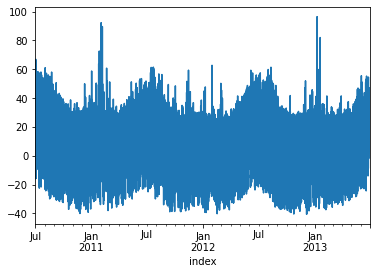

In [118]:
# DF_GC['net'].plot()
DF_to['net'].plot()
DF_net = DF_to

In [119]:
DF_net['Ticks'] = range(0,len(DF_net.index.values))
DF_net

,net,Ticks
index,,
2010-07-01 00:00:00,41.624,0
2010-07-01 00:30:00,32.182,1
2010-07-01 01:00:00,23.261,2
2010-07-01 01:30:00,17.651,3
2010-07-01 02:00:00,16.705,4
...,...,...
2013-06-30 21:30:00,30.924,52603
2013-06-30 22:00:00,26.851,52604
2013-06-30 22:30:00,26.593,52605


In [120]:
DF_chec = DF_net.reset_index()
DF_chec

,index,net,Ticks
0,2010-07-01 00:00:00,41.624,0
1,2010-07-01 00:30:00,32.182,1
2,2010-07-01 01:00:00,23.261,2
3,2010-07-01 01:30:00,17.651,3
4,2010-07-01 02:00:00,16.705,4
...,...,...,...
52603,2013-06-30 21:30:00,30.924,52603
52604,2013-06-30 22:00:00,26.851,52604
52605,2013-06-30 22:30:00,26.593,52605
52606,2013-06-30 23:00:00,25.383,52606


In [121]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [122]:
# model = LinearRegression().fit(DF_net[['Ticks']], DF_net[['net']])
# DF_net['predict'] =  model.predict(DF_net[['Ticks']])

In [123]:
##splitting dataset into test and train split
training_size=int(len(DF_net)*0.7)
test_size=len(DF_net)-training_size
train_data,test_data=DF_net[0:training_size],DF_net[training_size:len(DF_net)]

In [124]:
training_size

36825

In [125]:
test_size

15783

In [126]:
len(DF_net)

52608

In [127]:
training_size + test_size

52608

In [128]:
DF_net[0:training_size]

,net,Ticks
index,,
2010-07-01 00:00:00,41.624,0
2010-07-01 00:30:00,32.182,1
2010-07-01 01:00:00,23.261,2
2010-07-01 01:30:00,17.651,3
2010-07-01 02:00:00,16.705,4
...,...,...
2012-08-06 02:00:00,12.661,36820
2012-08-06 02:30:00,11.338,36821
2012-08-06 03:00:00,9.665,36822


In [129]:
train_data

,net,Ticks
index,,
2010-07-01 00:00:00,41.624,0
2010-07-01 00:30:00,32.182,1
2010-07-01 01:00:00,23.261,2
2010-07-01 01:30:00,17.651,3
2010-07-01 02:00:00,16.705,4
...,...,...
2012-08-06 02:00:00,12.661,36820
2012-08-06 02:30:00,11.338,36821
2012-08-06 03:00:00,9.665,36822


In [130]:
# Theory
#https://libraries.io/conda/sklearn-quantile

In [131]:
test_data

,net,Ticks
index,,
2012-08-06 04:30:00,12.391,36825
2012-08-06 05:00:00,17.836,36826
2012-08-06 05:30:00,19.995,36827
2012-08-06 06:00:00,20.184,36828
2012-08-06 06:30:00,29.387,36829
...,...,...
2013-06-30 21:30:00,30.924,52603
2013-06-30 22:00:00,26.851,52604
2013-06-30 22:30:00,26.593,52605


In [132]:
from sklearn_quantile import RandomForestQuantileRegressor

In [133]:
qrf = RandomForestQuantileRegressor(q=[0.05, 0.50, 0.95])
qrf.fit(train_data[['Ticks']], train_data['net'])

RandomForestQuantileRegressor(q=[0.05, 0.5, 0.95])

In [134]:
y_pred_5, y_pred_median, y_pred_95 = qrf.predict(test_data[['Ticks']])
DF_for = test_data
DF_for['0.05'] = y_pred_5
DF_for['0.5'] = y_pred_median
DF_for['0.95'] = y_pred_95

C:\Users\HP\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\HP\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [135]:
DF_for

,net,Ticks,0.05,0.5,0.95
index,,,,,
2012-08-06 04:30:00,12.391,36825,10.476,11.799999,12.131
2012-08-06 05:00:00,17.836,36826,10.476,11.799999,12.131
2012-08-06 05:30:00,19.995,36827,10.476,11.799999,12.131
2012-08-06 06:00:00,20.184,36828,10.476,11.799999,12.131
2012-08-06 06:30:00,29.387,36829,10.476,11.799999,12.131
...,...,...,...,...,...
2013-06-30 21:30:00,30.924,52603,10.476,11.799999,12.131
2013-06-30 22:00:00,26.851,52604,10.476,11.799999,12.131
2013-06-30 22:30:00,26.593,52605,10.476,11.799999,12.131


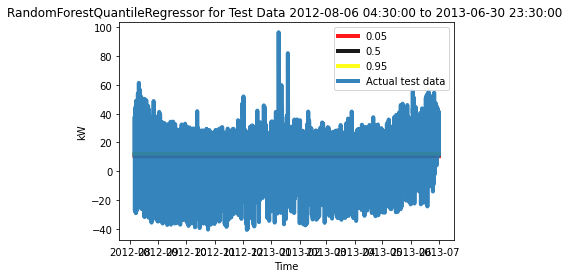

In [136]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(DF_for.index, DF_for['0.05'], color = (1,0,0), linewidth = 4, alpha = .9, label = '0.05');
ax.plot(DF_for.index, DF_for['0.5'], color = (0,0,0), linewidth = 4, alpha = .9, label = '0.5'); 
ax.plot(DF_for.index, DF_for['0.95'], color = (1,1,0), linewidth = 4, alpha = .9, label = '0.95');   
ax.plot(DF_for.index, DF_for['net'], linewidth = 4, alpha = .9, label = 'Actual test data'); 
plt.legend(loc="upper right")
plt.title('RandomForestQuantileRegressor for Test Data 2012-08-06 04:30:00 to 2013-06-30 23:30:00 ',loc='center')
plt.xlabel('Time')
plt.ylabel('kW')
plt.savefig('RandomForestQuantileRegressor Test data', dpi=150);


In [137]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(test_data['net'],DF_for['0.05']))
rmse_rf

18.527477414396916

In [138]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_data['net'],DF_for['0.05'])

14.426997065214636

In [96]:
DF_for['0.05']

index
2010-07-01 00:00:00    23.261000
2010-07-01 00:30:00    23.261000
2010-07-01 01:00:00    23.261000
2010-07-01 01:30:00    16.705000
2010-07-01 02:00:00    16.705000
                         ...    
2013-06-30 21:30:00    26.851000
2013-06-30 22:00:00    26.851000
2013-06-30 22:30:00    25.382999
2013-06-30 23:00:00    25.382999
2013-06-30 23:30:00    25.382999
Name: 0.05, Length: 52608, dtype: float32

In [43]:
qrf = RandomForestQuantileRegressor(q=[0.05, 0.50, 0.95])
qrf.fit(DF_net[['Ticks']], DF_net['net'])

RandomForestQuantileRegressor(q=[0.05, 0.5, 0.95])

In [81]:
# y_pred_5, y_pred_median, y_pred_95 = qrf.predict(DF_net[['Ticks']])
# DF_for = DF_net
# DF_for['0.05'] = y_pred_5
# DF_for['0.5'] = y_pred_median
# DF_for['0.95'] = y_pred_95 
q_05 = []
q_5 = []
q_95 = []
# while(i<48):
#         var = i + 52608
#         i = i+ 1
#         a,b,c = qrf.predict([[var]]) 
#         a =  np. reshape(a, 1)
#         b =  np. reshape(b, 1)
#         c =  np. reshape(c, 1)
#         q_05.append(a[0]) 
#         q_5.append(b[0]) 
#         q_95.append(c[0]) 


In [80]:
a,b,c = qrf.predict([[52609]]) 
a =  np. reshape(a, 1)
b =  np. reshape(b, 1)
c =  np. reshape(c, 1)
c[0]
# q_05.append(a[0]) 
# q_05

40.198

In [82]:
i = 0
while(i<48):
        var = i + 52608
        i = i+ 1
        a,b,c = qrf.predict([[var]]) 
        a =  np. reshape(a, 1)
        b =  np. reshape(b, 1)
        c =  np. reshape(c, 1)
        q_05.append(a[0]) 
        q_5.append(b[0]) 
        q_95.append(c[0]) 


In [84]:
 q_95

[40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198,
 40.198]

In [85]:
from pandas.tseries.offsets import Day
d0 = dfile.date.max() 
index = pd.date_range(d0, d0 + Day(1), freq='30T', closed='left')
index

DatetimeIndex(['2013-06-30 00:00:00', '2013-06-30 00:30:00',
               '2013-06-30 01:00:00', '2013-06-30 01:30:00',
               '2013-06-30 02:00:00', '2013-06-30 02:30:00',
               '2013-06-30 03:00:00', '2013-06-30 03:30:00',
               '2013-06-30 04:00:00', '2013-06-30 04:30:00',
               '2013-06-30 05:00:00', '2013-06-30 05:30:00',
               '2013-06-30 06:00:00', '2013-06-30 06:30:00',
               '2013-06-30 07:00:00', '2013-06-30 07:30:00',
               '2013-06-30 08:00:00', '2013-06-30 08:30:00',
               '2013-06-30 09:00:00', '2013-06-30 09:30:00',
               '2013-06-30 10:00:00', '2013-06-30 10:30:00',
               '2013-06-30 11:00:00', '2013-06-30 11:30:00',
               '2013-06-30 12:00:00', '2013-06-30 12:30:00',
               '2013-06-30 13:00:00', '2013-06-30 13:30:00',
               '2013-06-30 14:00:00', '2013-06-30 14:30:00',
               '2013-06-30 15:00:00', '2013-06-30 15:30:00',
               '2013-06-

In [ ]:
# data2 = pd.DataFrame({
#               '0.1': classifiers['0.1']['predictions']['0.1'],
#               '0.5': classifiers['0.5']['predictions']['0.5'],
#               '0.9': classifiers['0.9']['predictions']['0.9']})

In [86]:
data3 = pd.DataFrame(index=index)

In [87]:
data3['0.05'] =  q_05
data3['0.5'] =  q_5
data3['0.95'] =  q_95

In [88]:
data3

,0.05,0.5,0.95
2013-06-30 00:00:00,25.382999,26.593,40.198002
2013-06-30 00:30:00,25.382999,26.593,40.198002
2013-06-30 01:00:00,25.382999,26.593,40.198002
2013-06-30 01:30:00,25.382999,26.593,40.198002
2013-06-30 02:00:00,25.382999,26.593,40.198002
2013-06-30 02:30:00,25.382999,26.593,40.198002
2013-06-30 03:00:00,25.382999,26.593,40.198002
2013-06-30 03:30:00,25.382999,26.593,40.198002
2013-06-30 04:00:00,25.382999,26.593,40.198002
2013-06-30 04:30:00,25.382999,26.593,40.198002


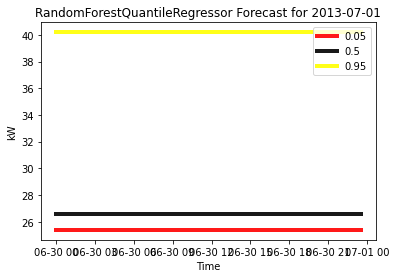

In [92]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(data3.index, data3['0.05'], color = (1,0,0), linewidth = 4, alpha = .9, label = '0.05');
ax.plot(data3.index, data3['0.5'], color = (0,0,0), linewidth = 4, alpha = .9, label = '0.5'); 
ax.plot(data3.index, data3['0.95'], color = (1,1,0), linewidth = 4, alpha = .9, label = '0.95');   
plt.legend(loc="upper right")
plt.title('RandomForestQuantileRegressor Forecast for 2013-07-01',loc='center')
plt.xlabel('Time')
plt.ylabel('kW')
plt.savefig('RandomForestQuantileRegressor Forecast for 2013-07-01', dpi=150);

In [139]:
# Theory 
# https://libraries.io/conda/sklearn-quantile